<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/t5_week3/blob/main/Yet_another_copy_of_Clustering1212_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load the Data

In [3]:
df=pd.read_csv("/content/drive/MyDrive/T5/4- Deep learning/1-Weekly Task/Datasets/Traffic_Accidents.csv")

In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1y3yJQEOOP0wQCTJM_hdRQn5RQcAE4XfDn3UBFL77fdY#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [5]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [7]:
df.describe

<bound method NDFrame.describe of        Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0                47                3.0                   1   
1                 1                3.0                   2   
2                62                3.0                   2   
3                 4                3.0                   1   
4                21                3.0                   2   
...             ...                ...                 ...   
51995            33                3.0                   2   
51996            44                3.0                   1   
51997            45                3.0                   3   
51998            30                3.0                   2   
51999            43                3.0                   3   

       Number_of_Casualties        Date  Day_of_Week  ...  2nd_Road_Class  \
0                       1.0  27/11/2009            6  ...              -1   
1                       1.0  10/10/2010            1  ...               6   
2                       1.0  14/09/2005            4  ...               3   
3                       2.0  18/08/2007            7  ...               6   
4                       2.0  06/08/2013            3  ...              -1   
...                     ...         ...          ...  ...             ...   
51995                   1.0  31/08/2012            6  ...               6   
51996                   1.0  08/05/2013            4  ...              -1   
51997                   1.0  01/11/2011            3  ...               6   
51998                   2.0  22/07/2011            6  ...               5   
51999                   1.0  24/05/2010            2  ...              -1   

      2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0                   0              None within 50 metres   
1                   0              None within 50 metres   
2                4055              None within 50 metres   
3                   0              None within 50 metres   
4                   0              None within 50 metres   
...               ...                                ...   
51995            6485              None within 50 metres   
51996               0              None within 50 metres   
51997               0              None within 50 metres   
51998              81              None within 50 metres   
51999               0              None within 50 metres   

           Pedestrian_Crossing-Physical_Facilities  \
0            No physical crossing within 50 meters   
1            No physical crossing within 50 meters   
2            No physical crossing within 50 meters   
3            No physical crossing within 50 meters   
4            No physical crossing within 50 meters   
...                                            ...   
51995  Pedestrian phase at traffic signal junction   
51996        No physical crossing within 50 meters   
51997        No physical crossing within 50 meters   
51998        No physical crossing within 50 meters   
51999        No physical crossing within 50 

In [8]:
df.sample

<bound method NDFrame.sample of        Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0                47                3.0                   1   
1                 1                3.0                   2   
2                62                3.0                   2   
3                 4                3.0                   1   
4                21                3.0                   2   
...             ...                ...                 ...   
51995            33                3.0                   2   
51996            44                3.0                   1   
51997            45                3.0                   3   
51998            30                3.0                   2   
51999            43                3.0                   3   

       Number_of_Casualties        Date  Day_of_Week  ...  2nd_Road_Class  \
0                       1.0  27/11/2009            6  ...              -1   
1                       1.0  10/10/2010            1  ...               6   
2                       1.0  14/09/2005            4  ...               3   
3                       2.0  18/08/2007            7  ...               6   
4                       2.0  06/08/2013            3  ...              -1   
...                     ...         ...          ...  ...             ...   
51995                   1.0  31/08/2012            6  ...               6   
51996                   1.0  08/05/2013            4  ...              -1   
51997                   1.0  01/11/2011            3  ...               6   
51998                   2.0  22/07/2011            6  ...               5   
51999                   1.0  24/05/2010            2  ...              -1   

      2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0                   0              None within 50 metres   
1                   0              None within 50 metres   
2                4055              None within 50 metres   
3                   0              None within 50 metres   
4                   0              None within 50 metres   
...               ...                                ...   
51995            6485              None within 50 metres   
51996               0              None within 50 metres   
51997               0              None within 50 metres   
51998              81              None within 50 metres   
51999               0              None within 50 metres   

           Pedestrian_Crossing-Physical_Facilities  \
0            No physical crossing within 50 meters   
1            No physical crossing within 50 meters   
2            No physical crossing within 50 meters   
3            No physical crossing within 50 meters   
4            No physical crossing within 50 meters   
...                                            ...   
51995  Pedestrian phase at traffic signal junction   
51996        No physical crossing within 50 meters   
51997        No physical crossing within 50 meters   
51998        No physical crossing within 50 meters   
51999        No physical crossing within 50 me

In [9]:
df.tail

<bound method NDFrame.tail of        Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0                47                3.0                   1   
1                 1                3.0                   2   
2                62                3.0                   2   
3                 4                3.0                   1   
4                21                3.0                   2   
...             ...                ...                 ...   
51995            33                3.0                   2   
51996            44                3.0                   1   
51997            45                3.0                   3   
51998            30                3.0                   2   
51999            43                3.0                   3   

       Number_of_Casualties        Date  Day_of_Week  ...  2nd_Road_Class  \
0                       1.0  27/11/2009            6  ...              -1   
1                       1.0  10/10/2010            1  ...               6   
2                       1.0  14/09/2005            4  ...               3   
3                       2.0  18/08/2007            7  ...               6   
4                       2.0  06/08/2013            3  ...              -1   
...                     ...         ...          ...  ...             ...   
51995                   1.0  31/08/2012            6  ...               6   
51996                   1.0  08/05/2013            4  ...              -1   
51997                   1.0  01/11/2011            3  ...               6   
51998                   2.0  22/07/2011            6  ...               5   
51999                   1.0  24/05/2010            2  ...              -1   

      2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0                   0              None within 50 metres   
1                   0              None within 50 metres   
2                4055              None within 50 metres   
3                   0              None within 50 metres   
4                   0              None within 50 metres   
...               ...                                ...   
51995            6485              None within 50 metres   
51996               0              None within 50 metres   
51997               0              None within 50 metres   
51998              81              None within 50 metres   
51999               0              None within 50 metres   

           Pedestrian_Crossing-Physical_Facilities  \
0            No physical crossing within 50 meters   
1            No physical crossing within 50 meters   
2            No physical crossing within 50 meters   
3            No physical crossing within 50 meters   
4            No physical crossing within 50 meters   
...                                            ...   
51995  Pedestrian phase at traffic signal junction   
51996        No physical crossing within 50 meters   
51997        No physical crossing within 50 meters   
51998        No physical crossing within 50 meters   
51999        No physical crossing within 50 mete

In [10]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [11]:
df.shape

(52000, 26)

<Axes: >

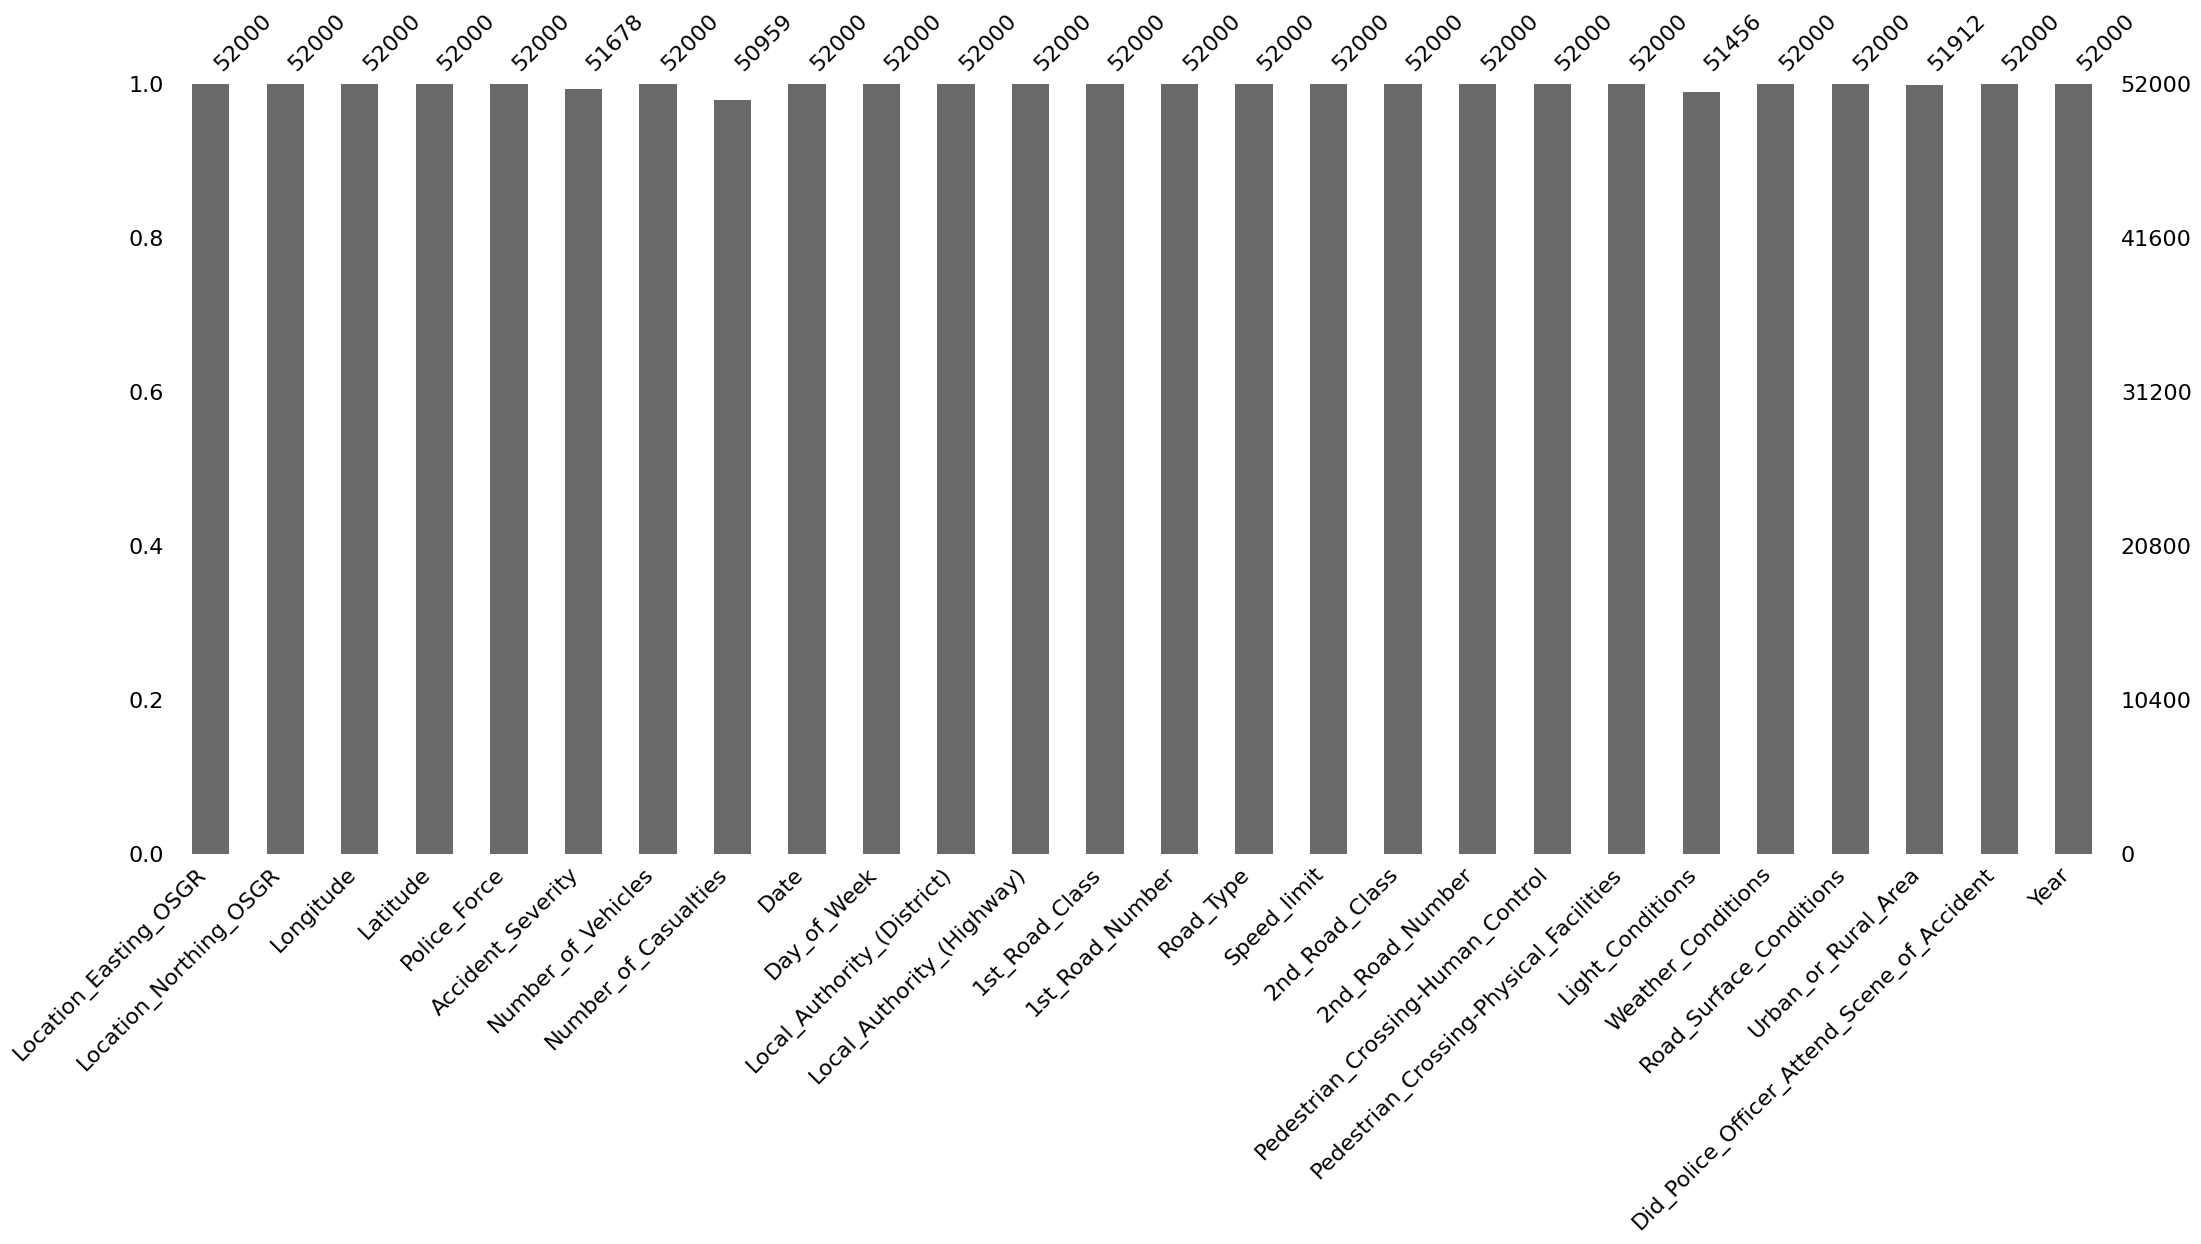

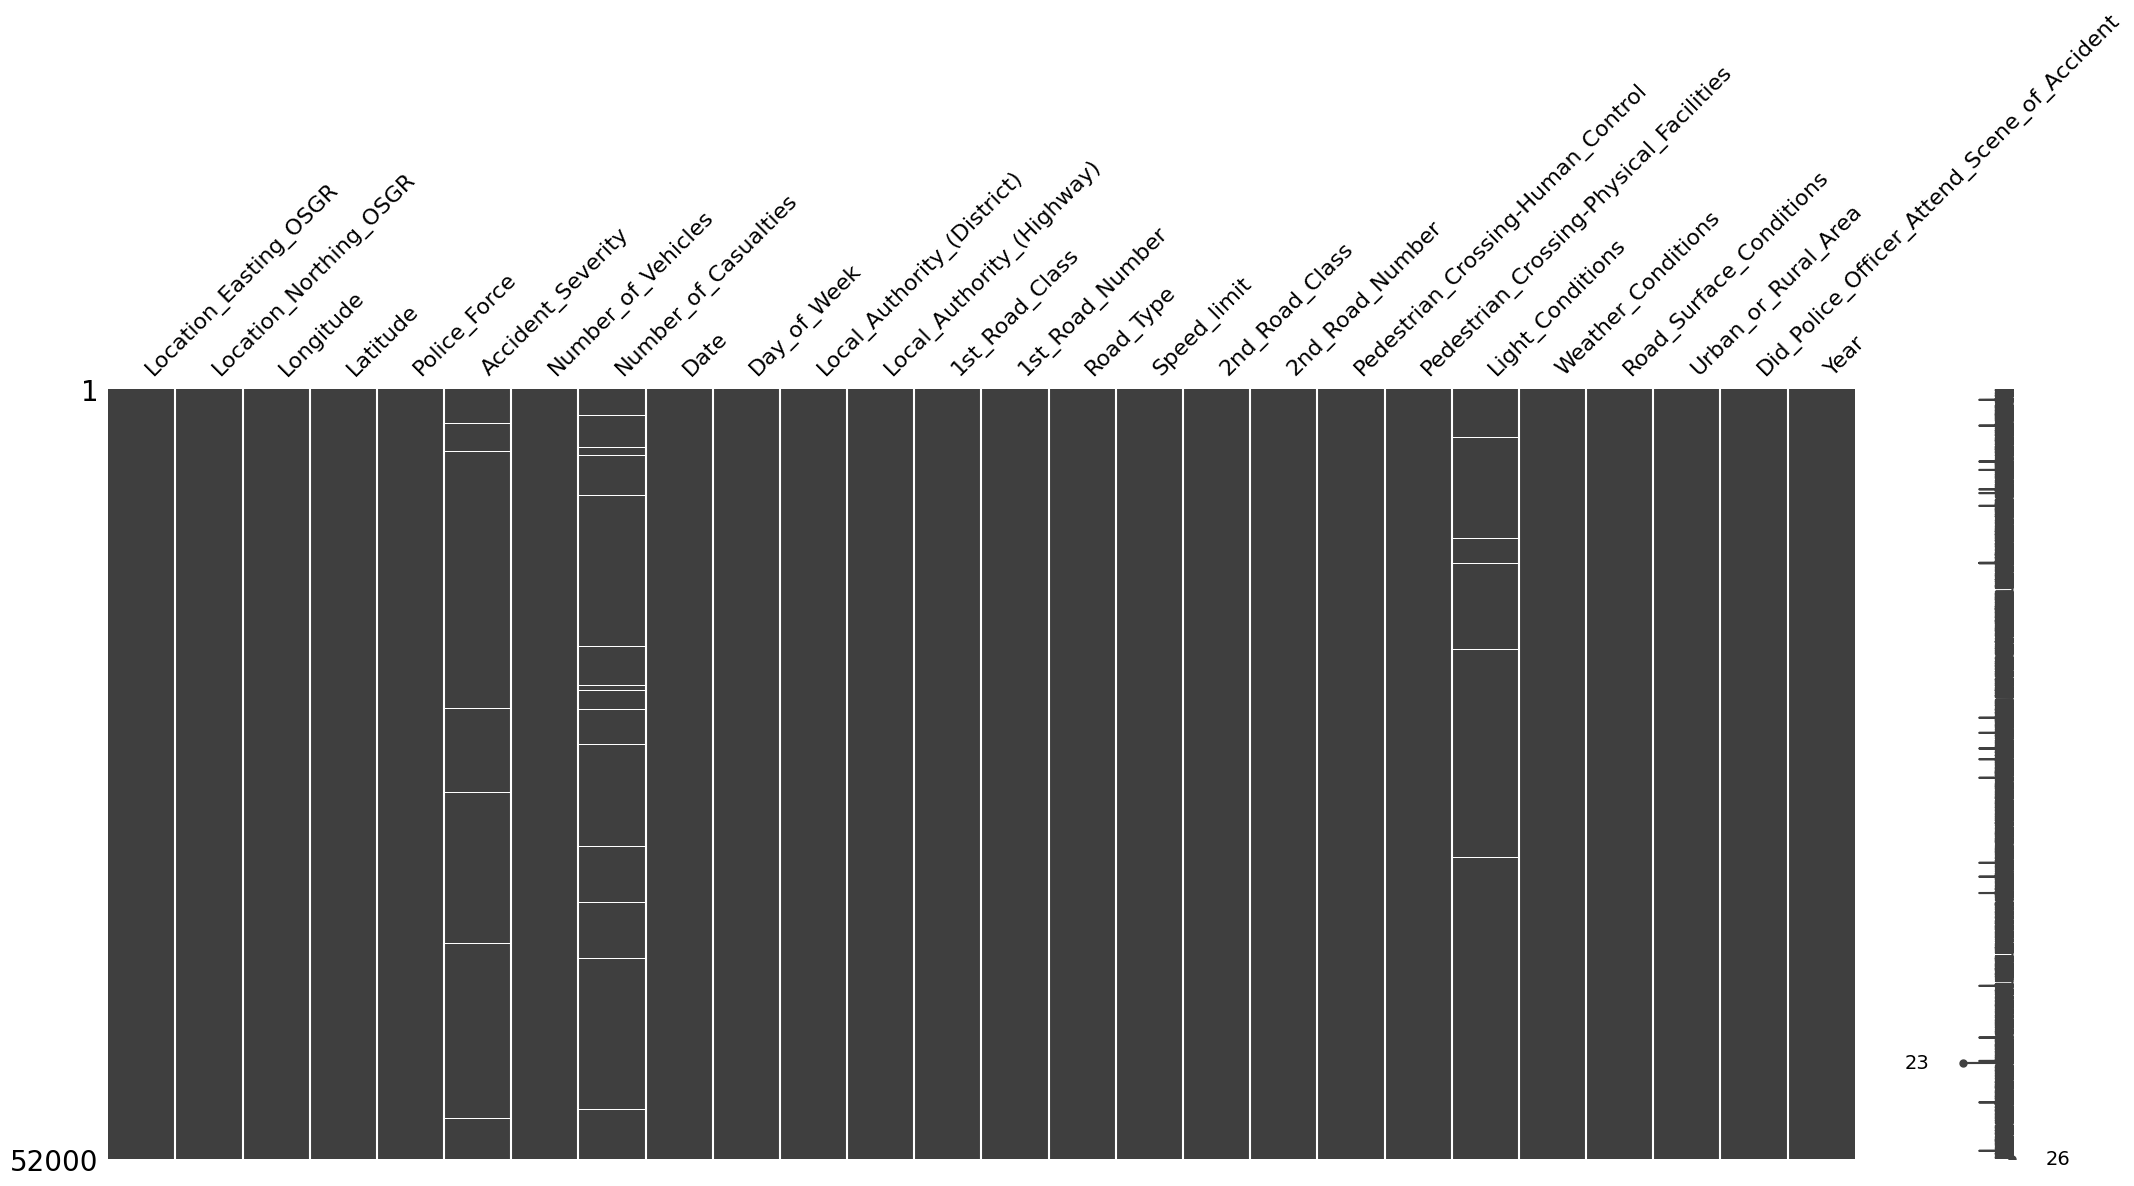

In [12]:
import missingno as msno


msno.bar(df)


msno.matrix(df)



In [13]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [14]:
#Light_Conditions 'Light_Conditions'
#2000-544=51456
#Missing values ​​represent 1/10

In [15]:
#Number_of_Casualties	1041 'Number_of_Casualties'
#1041-52000=50959
#Missing values ​​represent 1/5

In [16]:
df['Light_Conditions'].unique()

array(['Darkeness: No street lighting',
       'Darkness: Street lights present and lit',
       'Daylight: Street light present', nan,
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit'], dtype=object)

In [17]:
df['Light_Conditions'].value_counts()

,count
Light_Conditions,
Daylight: Street light present,37734
Darkness: Street lights present and lit,10130
Darkeness: No street lighting,2811
Darkness: Street lighting unknown,536
Darkness: Street lights present but unlit,245


In [18]:
df['Number_of_Casualties'].unique()

array([ 1.,  2.,  3., nan,  4.,  9.,  7.,  8.,  5.,  6., 42., 14., 12.,
       10., 13., 24., 51., 18., 11., 23.])

In [19]:
df['Number_of_Casualties'].value_counts()

,count
Number_of_Casualties,
1.0,39035
2.0,8199
3.0,2367
4.0,844
5.0,288
6.0,130
7.0,44
8.0,23
9.0,8


In [20]:
df['Accident_Severity'].unique

<bound method Series.unique of 0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
51995    3.0
51996    3.0
51997    3.0
51998    3.0
51999    3.0
Name: Accident_Severity, Length: 52000, dtype: float64>

In [21]:
df['Accident_Severity'].value_counts()

,count
Accident_Severity,
3.0,43927
2.0,7086
1.0,665


In [22]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [24]:
column_to_int=['Date','Local_Authority_(Highway)','Road_Type','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident',]

# tis is the o columns

In [25]:
encoded_columns = pd.get_dummies(df[['Date','Local_Authority_(Highway)','Road_Type','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident',]])


df = df.drop(['Date','Local_Authority_(Highway)','Road_Type','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions','Did_Police_Officer_Attend_Scene_of_Accident',], axis=1)


df = pd.concat([df, encoded_columns], axis=1)


print(df)

       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0

Light_Conditions
52000-544=51456
Missing values ​​represent 1/10

In [26]:
df.fillna(df.mean(), inplace=True)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [27]:
#for column in df.columns:
   # sns.boxplot(x=df[column])
   # plt.title(f'Boxplot of {column}')
   # plt.show()

In [28]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
...,...
Road_Surface_Conditions_Normal,0
Road_Surface_Conditions_Snow,0
Road_Surface_Conditions_Wet/Damp,0
Did_Police_Officer_Attend_Scene_of_Accident_No,0


In [29]:
def mark_outliers_as_nan(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])


for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        mark_outliers_as_nan(df, column)


print(df.head())
print(df.isnull().sum())

   Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0               560530.0                103950.0   0.277298  50.812789   
1               508860.0                187170.0  -0.430574  51.572846   
2               314460.0                169130.0  -3.231459  51.414661   
3               341700.0                408330.0  -2.881800  53.568318   
4               386488.0                350090.0  -2.203020  53.047882   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0          47.0                3.0                 1.0                   1.0   
1           1.0                3.0                 2.0                   1.0   
2          62.0                3.0                 2.0                   1.0   
3           4.0                3.0                 1.0                   NaN   
4          21.0                3.0                 2.0                   NaN   

   Day_of_Week  Local_Authority_(District)  ...  \
0          6.0         

In [30]:
df.isnull().sum()

,0
Location_Easting_OSGR,53
Location_Northing_OSGR,755
Longitude,33
Latitude,723
Police_Force,0
...,...
Road_Surface_Conditions_Normal,0
Road_Surface_Conditions_Snow,0
Road_Surface_Conditions_Wet/Damp,0
Did_Police_Officer_Attend_Scene_of_Accident_No,0


In [31]:
df.fillna(df.mean(), inplace=True)

In [32]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
...,...
Road_Surface_Conditions_Normal,0
Road_Surface_Conditions_Snow,0
Road_Surface_Conditions_Wet/Damp,0
Did_Police_Officer_Attend_Scene_of_Accident_No,0


In [33]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

df_StandardScaler=Scaler.fit_transform(df)

df_StandardScaler=pd.DataFrame(df_StandardScaler,columns=df.columns)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [34]:
#n_colummns=df_StandardScaler.select_dtypes(include=["number"]).columns
#df_StandardScaler[n_colummns].corr()

In [35]:
#plt.figure(figsize=(10, 6))
#sns.heatmap(df[n_colummns].corr(), annot=True, cmap="coolwarm")
#plt.title('Correlation Heatmap')
#plt.show()

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

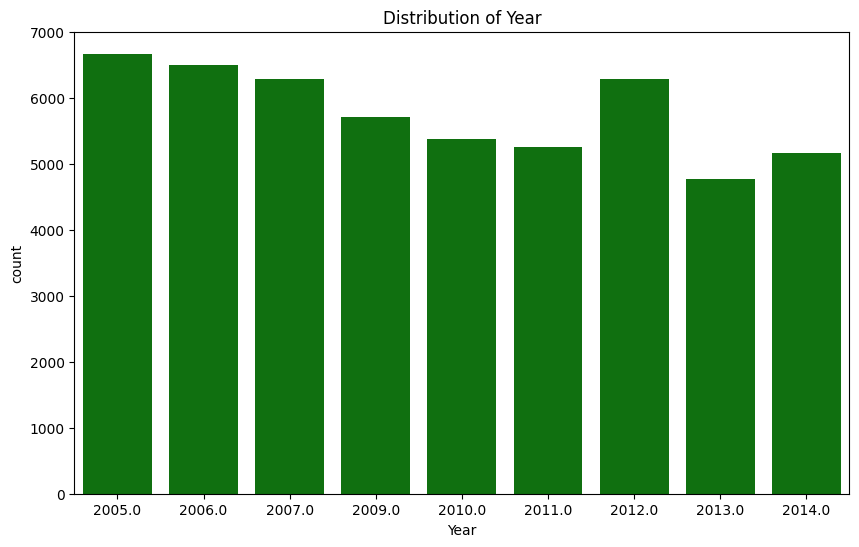

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df , x='Year',color='green')
plt.title('Distribution of Year')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

imputer = SimpleImputer(strategy='mean')


df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_imputed)

df_pca = pd.DataFrame(df_pca)

In [ ]:
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)


In [ ]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
optimal_k = 3


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_pca)

In [ ]:


import matplotlib.pyplot as plt

labels = kmeans.labels_


df['Cluster'] = labels


for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_data.describe())
    print("\n")


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
import matplotlib.pyplot as plt

labels = kmeans.labels_


df['Cluster'] = labels


for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_data.describe())
    print("\n")


## Plot the data points with their predicted cluster center

In [ ]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_


plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.title('Data Points with Predicted Cluster Centers')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?